<a href="https://colab.research.google.com/github/mayankjain281/ML_Unsupervised_Learning/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2023-09-02 12:06:45--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 173.194.210.102, 173.194.210.138, 173.194.210.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4tipk9og6ufgvo80brjn20p050gs48vu/1693656375000/10306167880925931714/*/1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W?e=download&uuid=46ecd771-8e99-492b-b3c4-8750ee90b38d [following]
--2023-09-02 12:06:46--  https://doc-10-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4tipk9og6ufgvo80brjn20p050gs48vu/1693656375000/10306167880925931714/*/1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W?e=download&uuid=46ecd771-8e99-492b-b3c4-8750ee90b38d
Resolving doc-10-64-docs.googleusercontent.com (doc-10-64-docs.googleusercontent.com)... 74.125.141.132, 2

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./E-commerce.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [ ]:
X=df.drop("ID",axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   n_clicks                 2500 non-null   int64  
 1   n_visits                 2500 non-null   int64  
 2   amount_spent             2500 non-null   float64
 3   amount_discount          2500 non-null   float64
 4   days_since_registration  2500 non-null   int64  
 5   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 117.3 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [ ]:
from sklearn.cluster import KMeans

k = 4 ## arbitrary value
kmeans = KMeans(n_clusters=k,random_state = 42)
y_pred = kmeans.fit_predict(X)
print(y_pred[:5])

[2 2 1 1 2]


In [ ]:
print(kmeans.cluster_centers_)

[[0.16763001 0.23205394 0.5132428  0.03436531 0.378177   0.36612938]
 [0.45336783 0.4704339  0.21776527 0.47129454 0.39159396 0.33704573]
 [0.27330589 0.32493667 0.11230841 0.06740043 0.56620473 0.34602498]
 [0.28589783 0.31533458 0.10716208 0.06305475 0.2394147  0.33093295]]


In [ ]:
clusters = pd.DataFrame(X, columns=df.drop("ID",axis=1).columns)
clusters['label'] = kmeans.labels_
clusters.head(3)

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,label
0,0.066890,0.220884,0.032571,0.013013,0.453307,0.401709,2
1,0.412207,0.144578,0.097333,0.002343,0.443580,0.290598,2
2,0.392977,0.369478,0.176234,0.347685,0.480545,0.699145,1


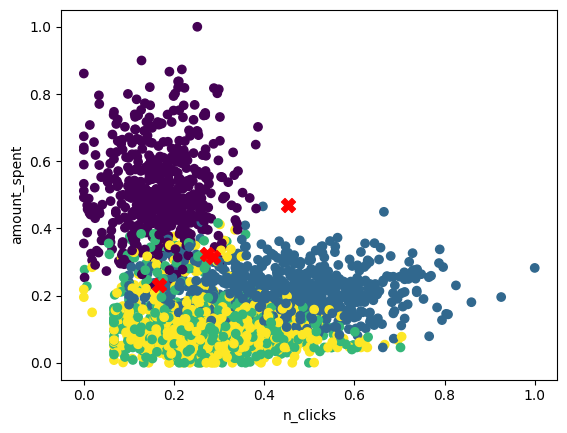

In [ ]:
def viz_clusters(kmeans):
    # plt.scatter(clusters['n_clicks'], clusters['amount_spent'], c=clusters['label'])
    plt.scatter(clusters['n_clicks'], clusters['amount_spent'], c=kmeans.labels_)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                color="red",
                marker="X",
                s=100)
    plt.xlabel('n_clicks')
    plt.ylabel('amount_spent')

viz_clusters(kmeans)

In [ ]:
kmeans_iter1 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="full", random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", random_state=0)
kmeans_iter3 = KMeans(n_clusters=8, init="random", n_init=1,
                     algorithm="full", random_state=0)
kmeans_iter4 = KMeans(n_clusters=20, init="random", n_init=1,
                     algorithm="full", random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)
kmeans_iter4.fit(X)

KMeans(algorithm='full', init='random', n_clusters=20, n_init=1, random_state=0)

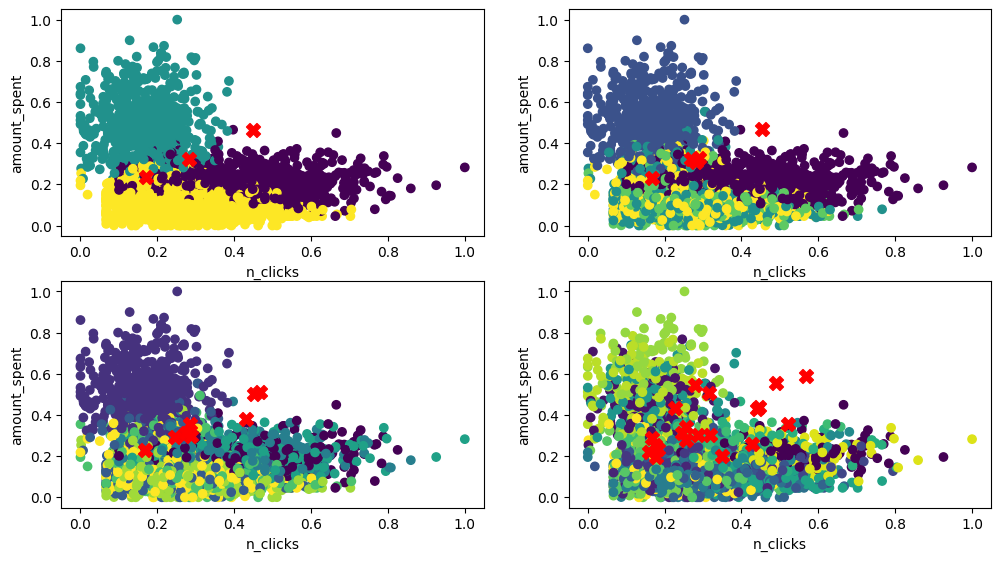

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(321)
viz_clusters(kmeans_iter1)

plt.subplot(322)
viz_clusters(kmeans_iter2)

plt.subplot(323)
viz_clusters(kmeans_iter3)

plt.subplot(324)
viz_clusters(kmeans_iter4)

In [ ]:
kmeans_iter1.inertia_, kmeans_iter2.inertia_, kmeans_iter3.inertia_, kmeans_iter4.inertia_,

(280.16509626121075, 230.23795795912437, 195.24159155451287, 135.4463210714925)

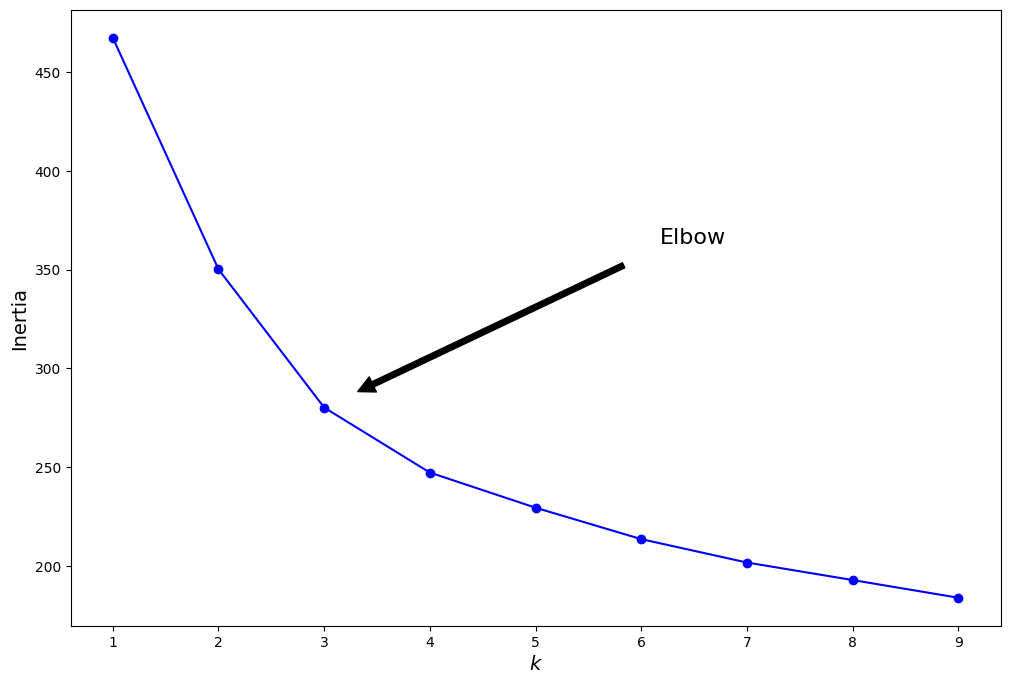

CPU times: user 8.14 s, sys: 1.57 s, total: 9.71 s
Wall time: 10.7 s


In [ ]:
%%time
# Inertia = Within Cluster Sum of Squares
max_k = 10
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, max_k)]

inertias = [model.inertia_ for model in kmeans_per_k]
##################################
plt.figure(figsize=(12, 8))
plt.plot(range(1, max_k), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [ ]:
# confused between 3 and 4?
# pick higher silhouette_score

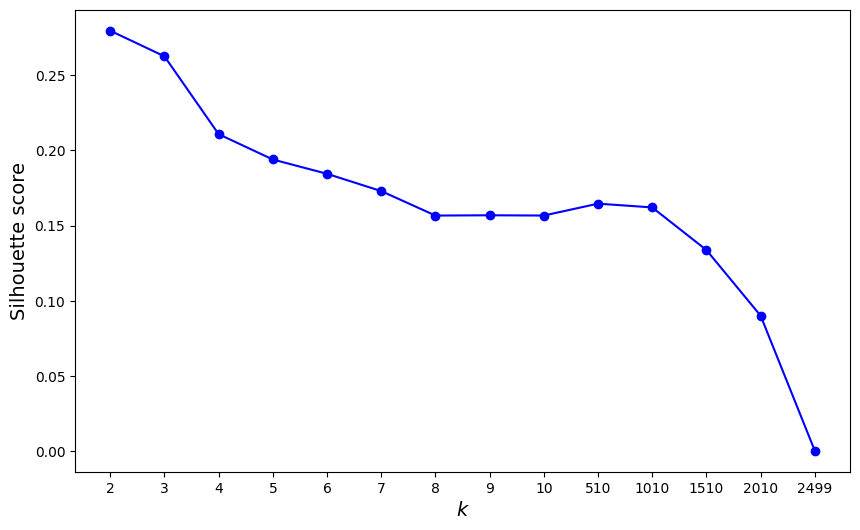

CPU times: user 48.6 s, sys: 7.26 s, total: 55.9 s
Wall time: 56.1 s


In [ ]:
%%time
from sklearn.metrics import silhouette_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

max_k = 10
Ks = list(range(2,max_k)) + list(range(max_k,len(X)-1, 500)) + [len(X)-1]
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in Ks]

## plot for different values of K
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k]

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(Ks)+1), silhouette_scores, "bo-")
plt.xticks(ticks=range(1, len(Ks)+1), labels=Ks)
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

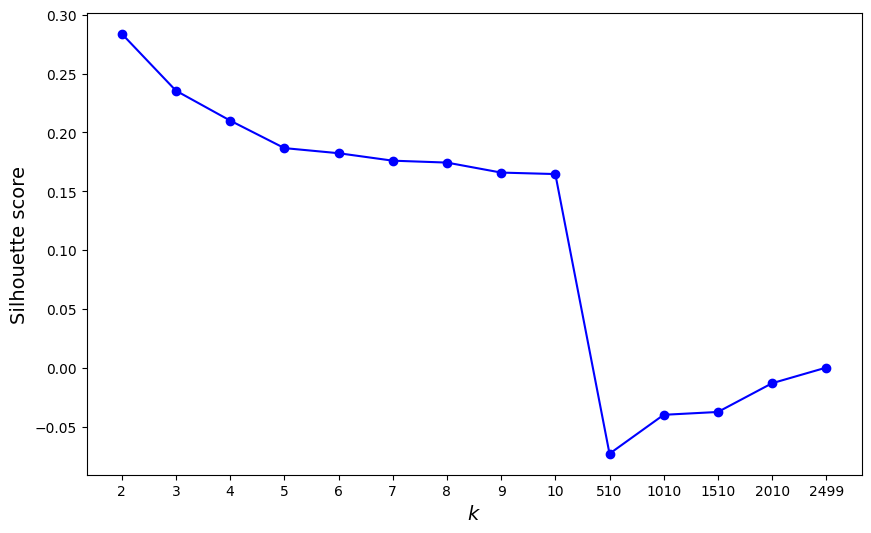

CPU times: user 3.18 s, sys: 1.22 s, total: 4.4 s
Wall time: 4.9 s


In [ ]:
%%time
from sklearn.metrics import silhouette_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

max_k = 10
Ks = list(range(2,max_k)) + list(range(max_k,len(X)-1, 500)) + [len(X)-1]
kmeans_per_k = [KMeans(n_clusters=k, max_iter=1, n_init=1, init=[X[0]]*k).fit(X)
                for k in Ks]

## plot for different values of K
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k]

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(Ks)+1), silhouette_scores, "bo-")
plt.xticks(ticks=range(1, len(Ks)+1), labels=Ks)
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

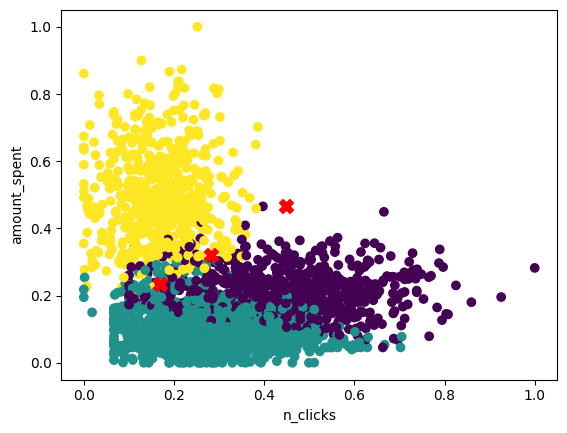

In [ ]:
viz_clusters(KMeans(n_clusters=3, random_state=42).fit(X))

In [ ]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

# create clusters
# hc_2020 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean')
# y_pred = hc_2020.fit_predict(df)

![](https://miro.medium.com/v2/resize:fit:720/1*oF00T9hCGpr6N-1zm2M1nw.gif)

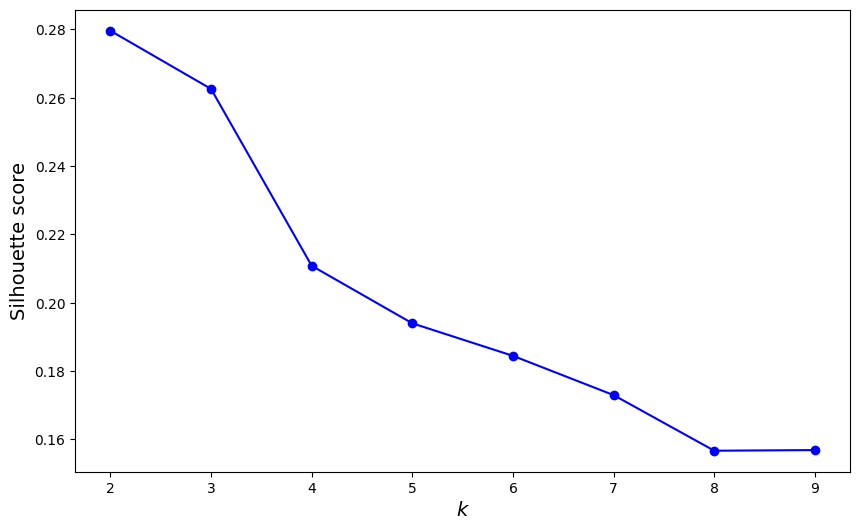

CPU times: user 7.31 s, sys: 2.91 s, total: 10.2 s
Wall time: 7.54 s


In [ ]:
%%time
from sklearn.metrics import silhouette_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

max_k = 10
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, max_k)]

## plot for different values of K
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()